# Visualização de dados de uma conversa num grupo de WhatsApp

Para fazer isso, usam-se estas bibliotecas: chatminer, pandas, numpy, bs4, e matplotlib, e spacy. A função de cada uma será descrita nas próximas células.

Em primeiro lugar, importamos a função <i>whatsapp parser</i> e lemos o arquivo.txt com ela.

In [3]:
from chatminer.chatparsers import WhatsAppParser

parser = WhatsAppParser('zap.txt')

c:\Users\mateu\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
31.01.2023 20:41:49 INFO     
            Depending on the platform, the message format in chat logs might not be
            standardized accross devices/versions/localization and might change over
            time. Please report issues including your message format via GitHub.
            
31.01.2023 20:41:49 INFO     Initialized parser.
31.01.2023 20:41:49 INFO     Starting reading raw messages into memory...
31.01.2023 20:41:50 INFO     Finished reading 39999 raw messages into memory.
31.01.2023 20:41:50 INFO     Inferred DMY format for date.


De que tipo é o objeto parser?

In [4]:
type(parser)

chatminer.chatparsers.WhatsAppParser

Agora, vou convertê-la em DataFrame, objeto da biblioteca pandas, com a qual vou visualizar os dados com o matplotlib.

In [5]:
parser.parse_file_into_df()

31.01.2023 20:41:50 INFO     Starting parsing raw messages into dataframe...
100%|██████████| 39999/39999 [00:06<00:00, 6373.40it/s]
31.01.2023 20:41:57 INFO     Finished parsing raw messages into dataframe.


O objeto parser agora tem um dataframe. Para acessá-lo, basta por .df

In [6]:
import pandas
df = parser.df
df

,datetime,author,message,weekday,hour,words,letters
0,2023-01-16 16:25:00,Lucas Muniz,txt?,Monday,16,1,4
1,2023-01-16 15:44:00,Mateus,Descobri um módulo maneiro em Python que compi...,Monday,15,11,69
2,2023-01-16 15:43:00,Mateus,Quem tem as mensagens mais antigas do grupo?,Monday,15,8,44
3,2023-01-16 15:43:00,Mateus,Rapaziada,Monday,15,1,9
4,2023-01-16 09:02:00,Pablo,Intankavel,Monday,9,1,10
...,...,...,...,...,...,...,...
39994,2022-02-07 14:25:00,Lucas Muniz,vou esperar o jogo da discórdia pra ver se dá ...,Monday,14,20,88
39995,2022-02-07 14:23:00,Inayara,Dg se lascou com o voto ontem,Monday,14,7,29
39996,2022-02-07 14:23:00,Pablo,????,Monday,14,1,4
39997,2022-02-07 14:23:00,Inayara,Tb acho q não,Monday,14,4,13


Definitivamente, não quero mensagens do aplicativo atrapalhando nossos dados

In [7]:
df = df[(df.author != 'System') & (df.message != "<Arquivo de mídia oculto>") & (df.message != "Mensagem apagada")]
df

,datetime,author,message,weekday,hour,words,letters
0,2023-01-16 16:25:00,Lucas Muniz,txt?,Monday,16,1,4
1,2023-01-16 15:44:00,Mateus,Descobri um módulo maneiro em Python que compi...,Monday,15,11,69
2,2023-01-16 15:43:00,Mateus,Quem tem as mensagens mais antigas do grupo?,Monday,15,8,44
3,2023-01-16 15:43:00,Mateus,Rapaziada,Monday,15,1,9
4,2023-01-16 09:02:00,Pablo,Intankavel,Monday,9,1,10
...,...,...,...,...,...,...,...
39994,2022-02-07 14:25:00,Lucas Muniz,vou esperar o jogo da discórdia pra ver se dá ...,Monday,14,20,88
39995,2022-02-07 14:23:00,Inayara,Dg se lascou com o voto ontem,Monday,14,7,29
39996,2022-02-07 14:23:00,Pablo,????,Monday,14,1,4
39997,2022-02-07 14:23:00,Inayara,Tb acho q não,Monday,14,4,13


Agora, vou colecionar as <i>stopwords</i>, ou seja, artigos, pronomes demonstativos e preposições, basicamente. Vou fazer isso com o módulo nltk

In [14]:
from nltk.corpus import stopwords
s_words = stopwords.words('portuguese') + \
    ['pra', 'n', 'q', 'https', 'ai', 'aí', 'porra', 'caralho', 'merda']
# adicionei estas palavras para não poluir o wordcloud,
# mas, para refletir bem a conversa do grupo, o ideal seria não
# censurar os palavrões
s_words[0:10]


['a',
 'à',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as']

## Visualização

Vou usar estes módulos:
Counter, matplotlib e vis

### Histograma

Em primeiro lugar, vou gerar um histograma com a frequência de mensagens por autor.

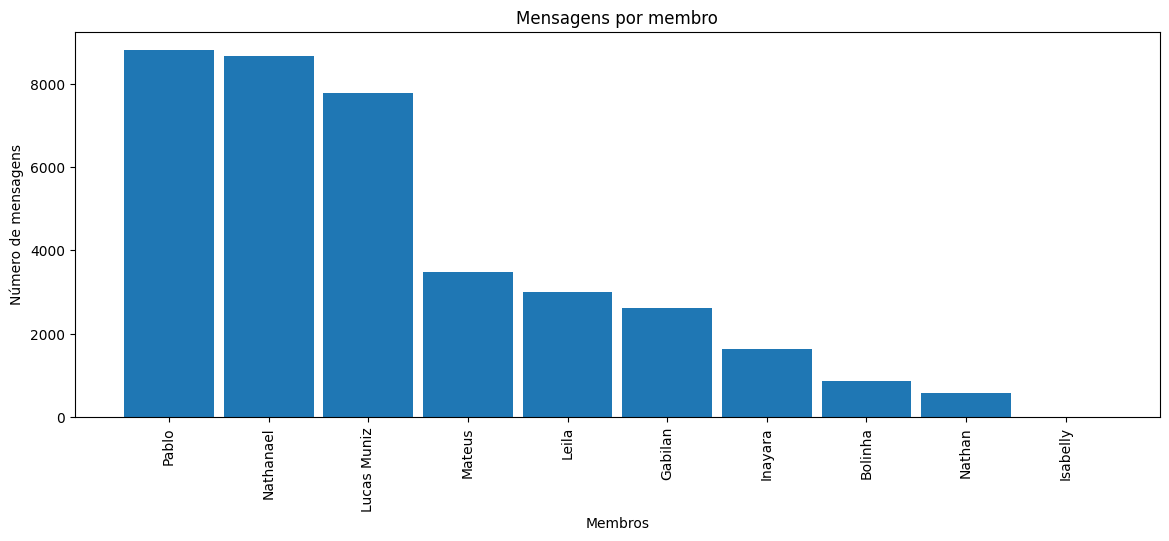

In [9]:
from collections import Counter
import matplotlib.pyplot as plt
author_counts = Counter(df.author)
author_counts = {k: v for k, v in sorted(author_counts.items(), key=lambda item: item[1], reverse=True)} # ordenando o dicionário
fig = plt.figure(figsize = (14, 5))
plt.bar(list(author_counts.keys()), author_counts.values(), width=0.9)
plt.xlabel("Membros")
plt.ylabel("Número de mensagens")
plt.title("Mensagens por membro")
plt.xticks(range(len(author_counts.keys())), author_counts.keys(), rotation='vertical')
plt.show()

### Heatmaps

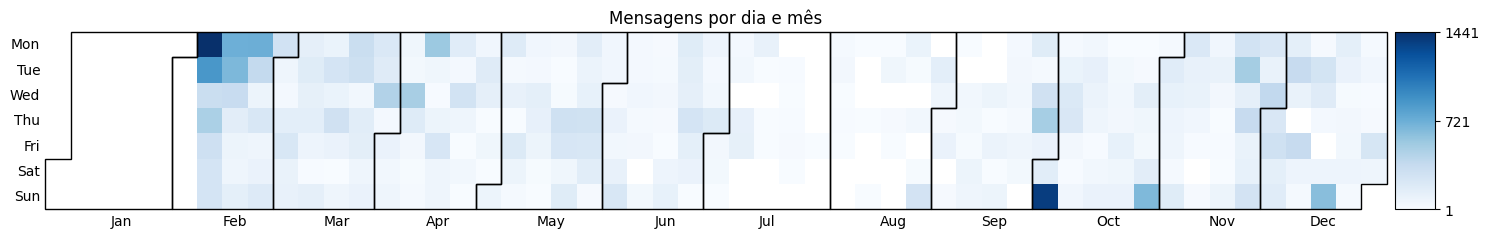

In [10]:
import chatminer.visualizations as vis
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
plt.title("Mensagens por dia e mês")
ax = vis.calendar_heatmap(df, year=2022, linewidth=0, monthly_border=True, ax=ax)

### Sunburst

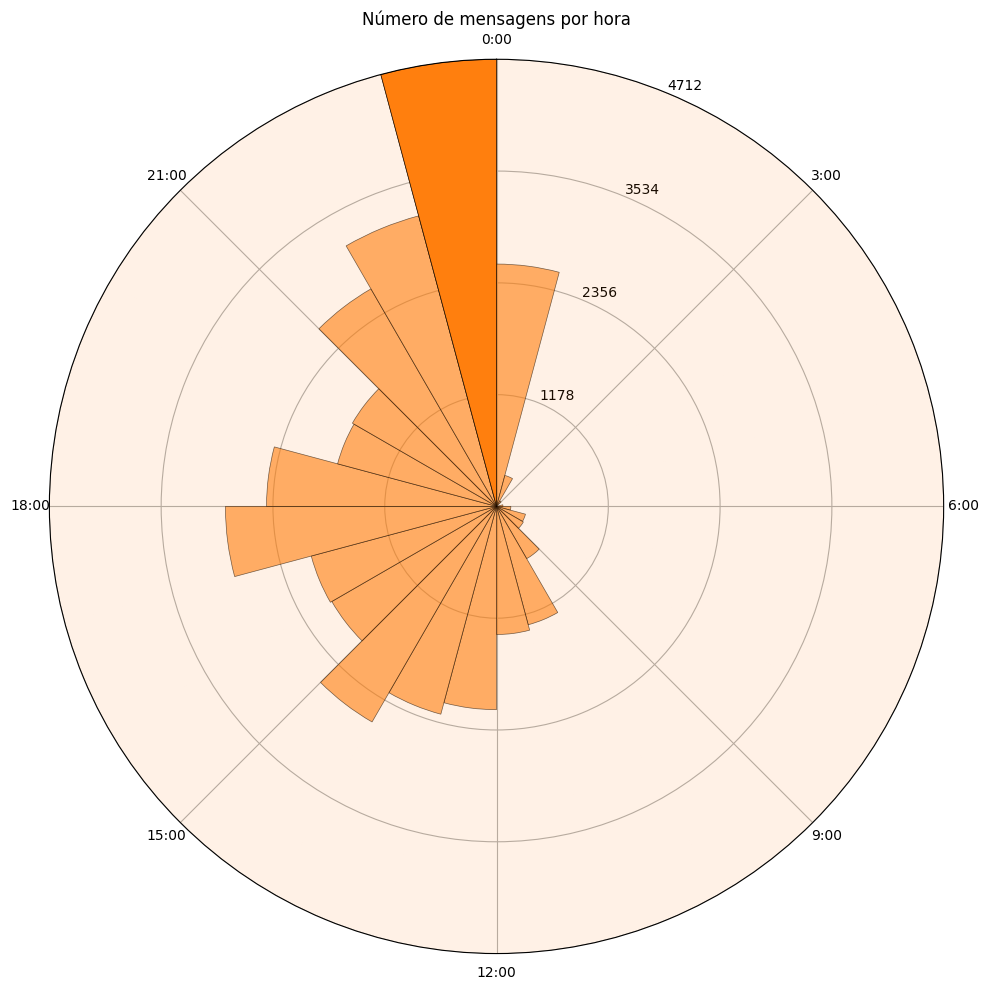

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10), subplot_kw={'projection': 'polar'})
plt.title("Número de mensagens por hora")
ax = vis.sunburst(df, highlight_max=True, isolines=[0.25, 0.5, 0.75, 1], color='C1', ax=ax)

### Wordcloud

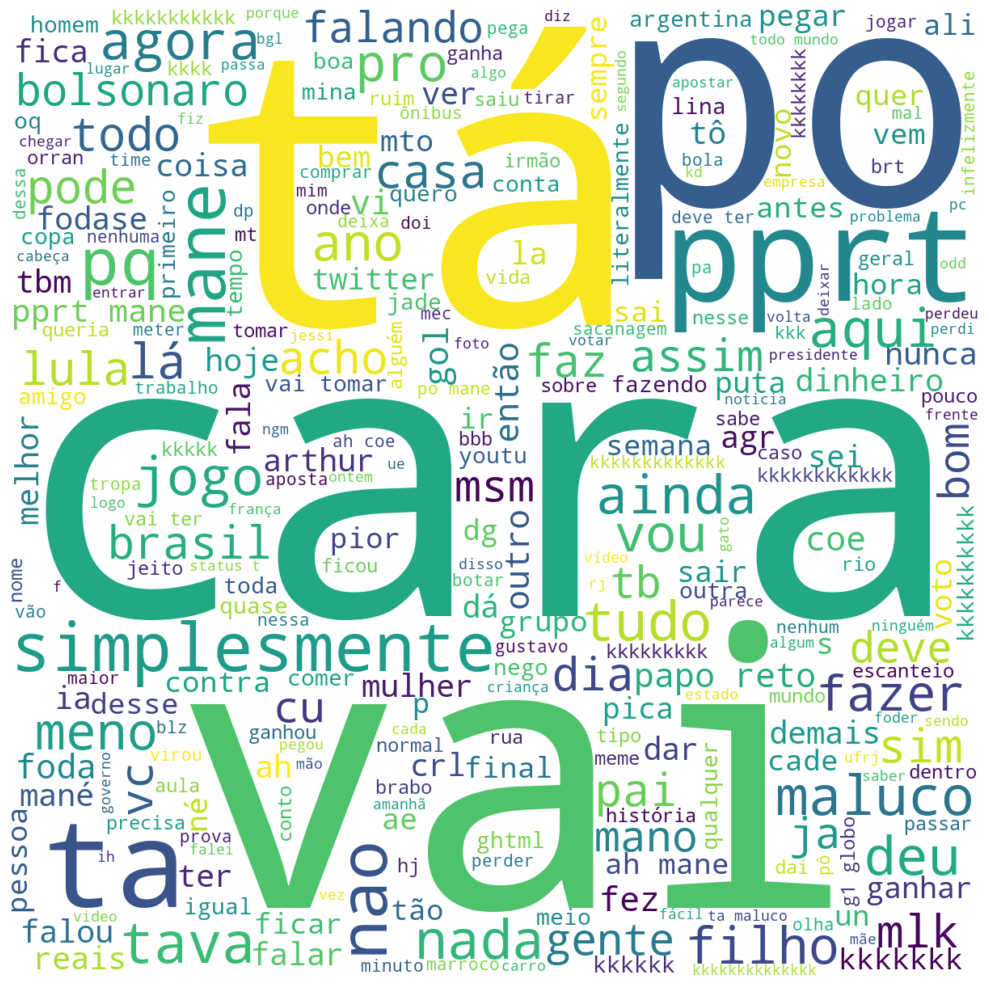

In [16]:
fig, ax = plt.subplots(figsize=(10, 10))
kwargs={"background_color": "white", "width": 1200, "height": 1200, "max_words": 300}
ax = vis.wordcloud(df, ax=ax, stopwords=s_words, **kwargs)

### Radarchart

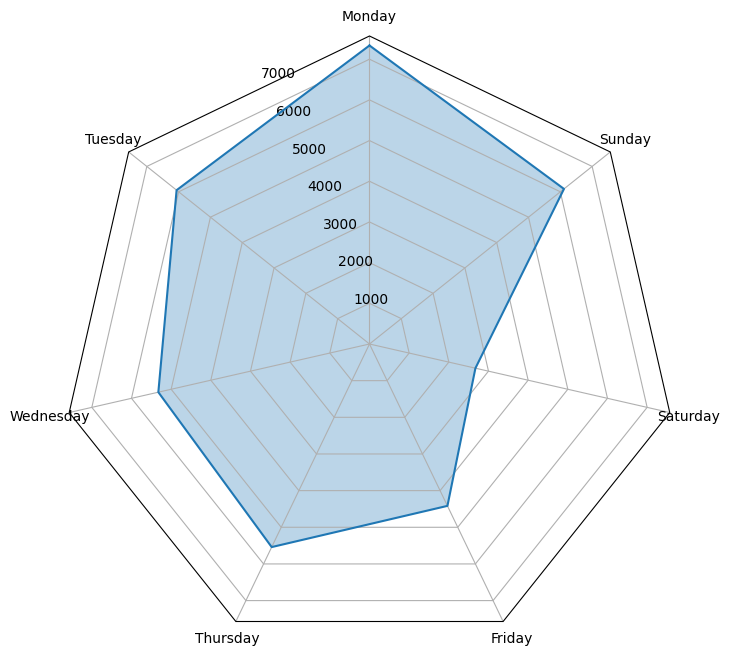

In [13]:
vis.radar_factory(7, frame="polygon")
fig, ax = plt.subplots(1, 1, figsize=(8, 8), subplot_kw={'projection': 'radar'})
ax = vis.radar(df, ax=ax)